# **FLOOD RISK PREDICTION**


**PROBLEM_STATEMENT-** The project is a regression problem focused on predicting the Flood Probability based on a variety of contributing factors.

The primary objective is to develop a machine learning model that accurately estimates the likelihood of a flood, which is represented by the continuous variable

In [ ]:
# Import essential libraries for numerical operations and data handling.
import numpy as np
import pandas as pd

In [ ]:
# Define the file paths for the training and test datasets.

TRAIN_DATAPATH = '/content/train.csv'

TEST_DATAPATH = '/content/test.csv'

In [ ]:
# Load the datasets into pandas DataFrames.
#'df' holds the training data, and 'new' holds the test data.

df = pd.read_csv(TRAIN_DATAPATH)
new = pd.read_csv(TEST_DATAPATH)

In [ ]:
#Check the first few rows and dimensions of the datasets.
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
new.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [ ]:
# Check the dimensions (rows, columns) of both dataframes
print(df.shape, new.shape)

(1117957, 22) (745305, 21)


In [ ]:
# Get a summary of the training data (data types, non-null values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
# Get a summary of the test data
print(new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [ ]:

df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
##    Remove the 'id' column from the main dataframes as it's not a feature.
#    Store the test 'id' column separately for submission file creation.
df.drop(columns=['id'], inplace=True)

In [ ]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
for col in df.columns:
    print(col,": ",df[col].dtype)

MonsoonIntensity :  int64
TopographyDrainage :  int64
RiverManagement :  int64
Deforestation :  int64
Urbanization :  int64
ClimateChange :  int64
DamsQuality :  int64
Siltation :  int64
AgriculturalPractices :  int64
Encroachments :  int64
IneffectiveDisasterPreparedness :  int64
DrainageSystems :  int64
CoastalVulnerability :  int64
Landslides :  int64
Watersheds :  int64
DeterioratingInfrastructure :  int64
PopulationScore :  int64
WetlandLoss :  int64
InadequatePlanning :  int64
PoliticalFactors :  int64
FloodProbability :  float64


In [ ]:
print(df.columns)

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


In [ ]:
shape = df.shape
print(shape)

(1117957, 21)


In [ ]:
# Check for missing values in the training data
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Count duplicate rows in the training data
df.duplicated().value_counts()

,count
False,1117957


In [ ]:
df.duplicated().sum()

np.int64(0)

**EDA - EXPLORATORY DATA ANALYSIS**

In [ ]:
### Display descriptive statistics for the training data
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [ ]:
X = df.drop(columns='FloodProbability')

In [ ]:
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


In [ ]:

y = df['FloodProbability']
y.head()

,FloodProbability
0,0.445
1,0.450
2,0.530
3,0.535
4,0.415


In [ ]:
# pip install numerics

In [ ]:
#Import visualization libraries and display the correlation matrix.
import matplotlib.pyplot as plt
import seaborn as sns

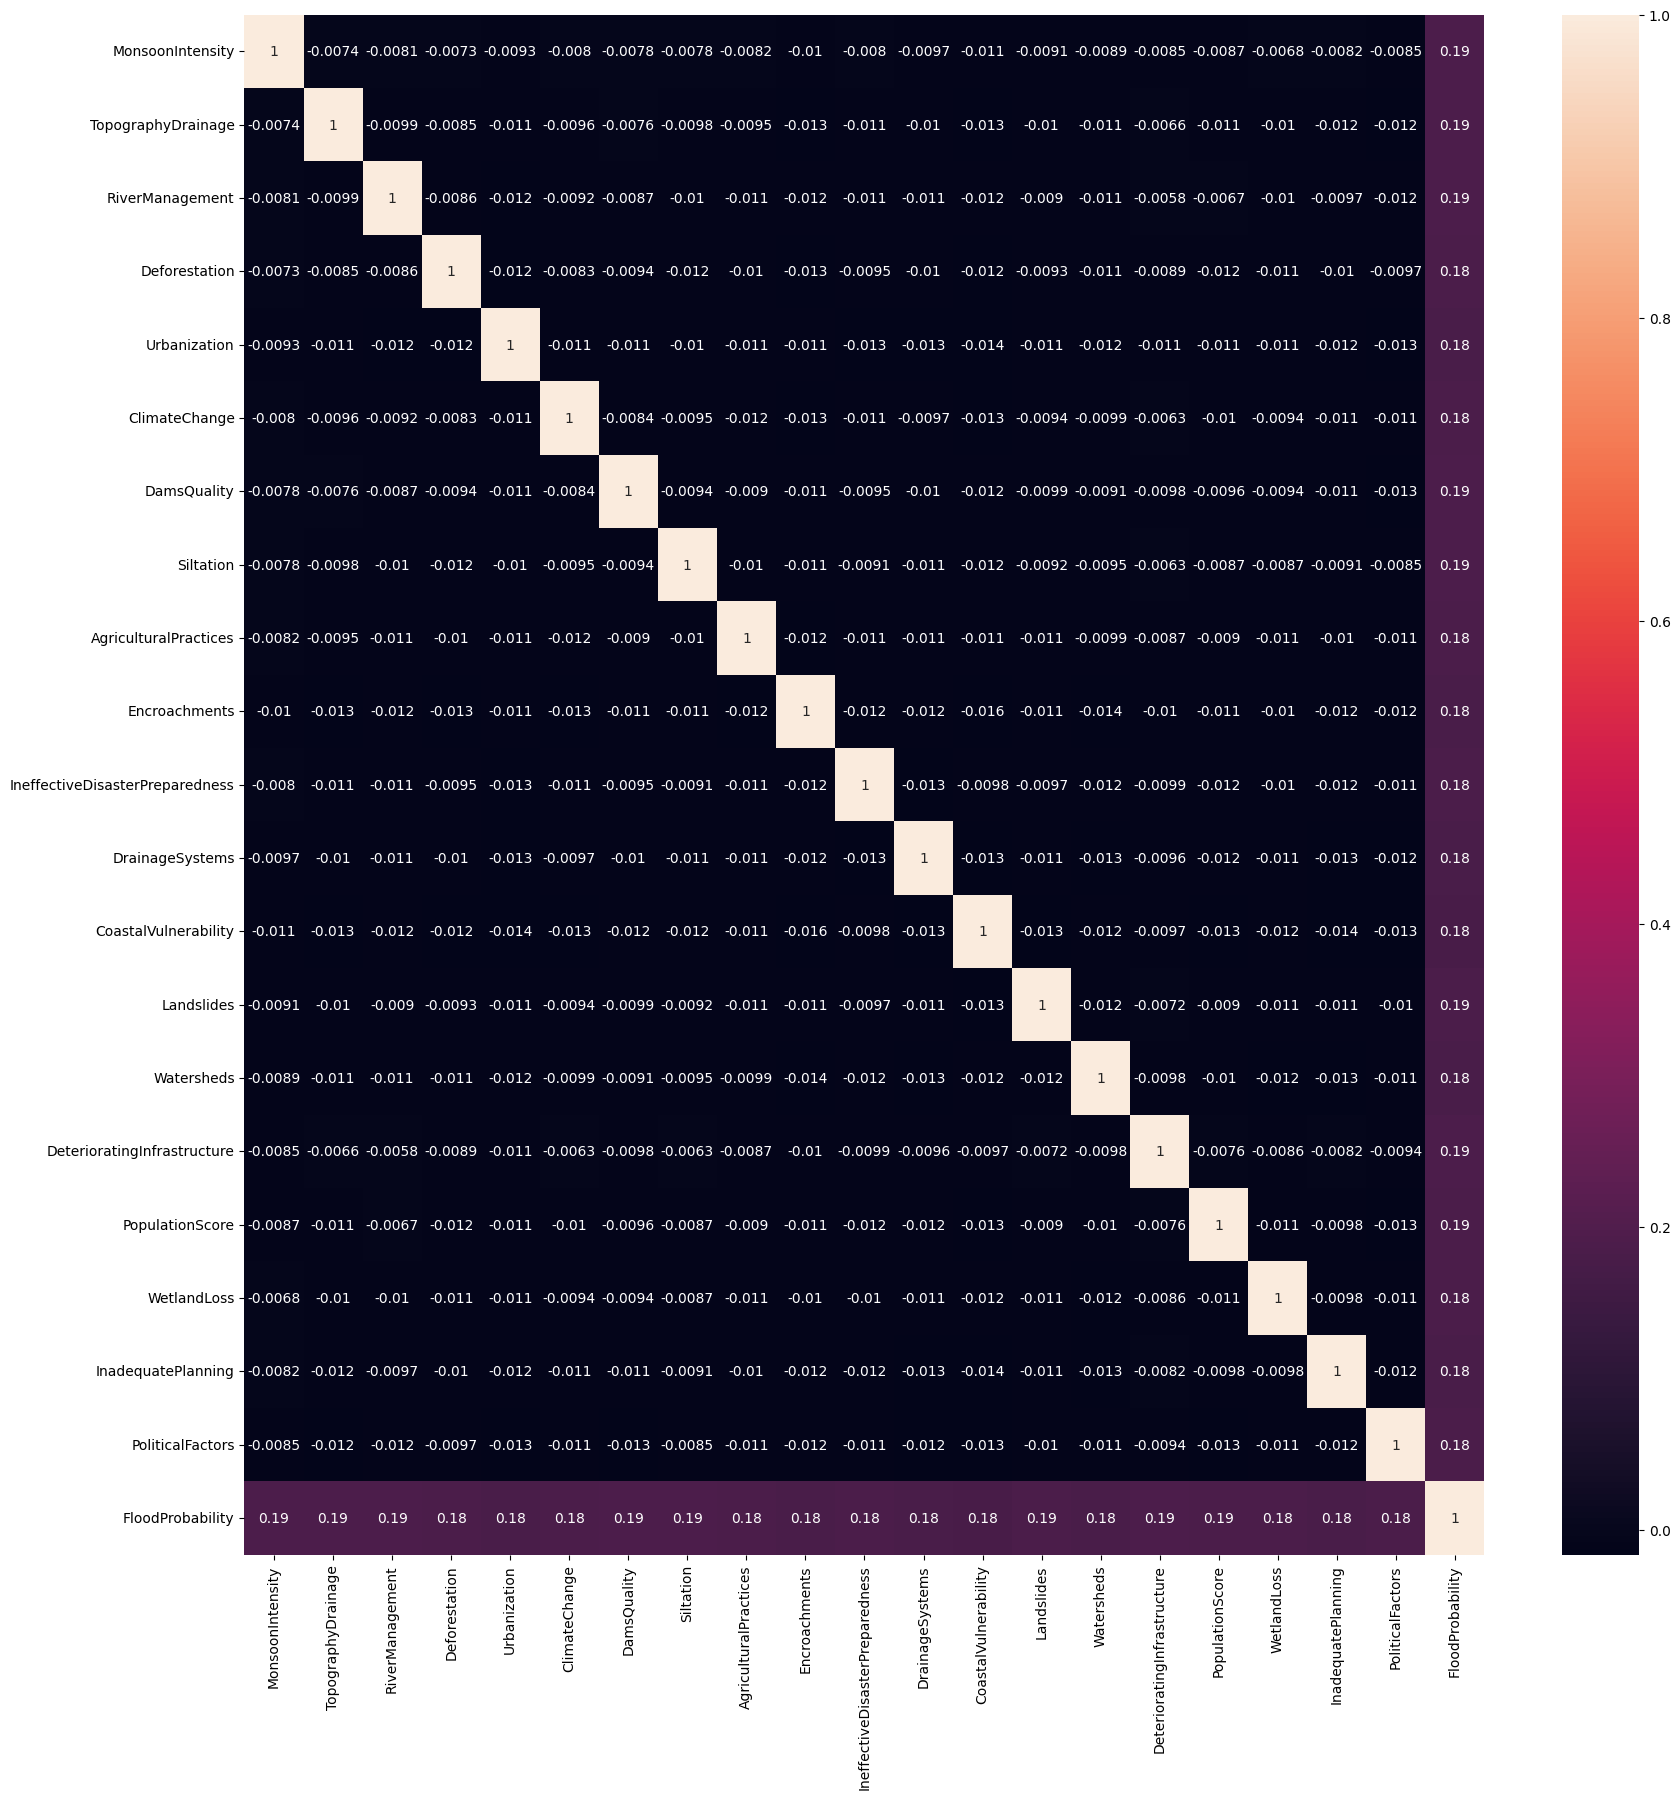

In [ ]:
## Generate a correlation heatmap for feature analysis
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


**FEATURE ENGINEERING**

In [ ]:
# spliting the data in training and testing
#Import necessary modules for model selection and splitting the data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((894365, 20), (223592, 20), (894365,), (223592,))

In [ ]:
# scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [ ]:
X_train_s

array([[-0.933755  ,  0.98951426,  0.02138013, ...,  2.44052249,
        -0.45186862,  0.50846772],
       [-0.44748465,  0.5121668 ,  1.46911161, ...,  0.02382422,
         0.98929176,  0.98700029],
       [ 0.52505607, -0.91987559, -0.46119703, ...,  0.50716387,
         1.46967855,  0.02993514],
       ...,
       [-0.933755  , -0.44252813, -0.46119703, ..., -0.45951544,
        -1.89302899,  0.98700029],
       [-0.44748465, -0.44252813,  0.50395729, ..., -0.45951544,
        -0.45186862,  0.98700029],
       [ 0.03878571, -0.44252813,  0.02138013, ...,  2.44052249,
         0.02851817, -0.92713002]])

In [ ]:
X_train_s.shape,X_test_s.shape

((894365, 20), (223592, 20))

In [ ]:
y_train.shape,y_test.shape

((894365,), (223592,))

In [ ]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(ss, f)

In [ ]:
# # if i wangt to load it again
# with open("scaler.pkl", "rb") as f:
#     loaded_scaler = pickle.load(f)

# # Apply on new data
# X_new_scaled = loaded_scaler.transform(X_new)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype
---  ------                           --------------    -----
 0   MonsoonIntensity                 1117957 non-null  int64
 1   TopographyDrainage               1117957 non-null  int64
 2   RiverManagement                  1117957 non-null  int64
 3   Deforestation                    1117957 non-null  int64
 4   Urbanization                     1117957 non-null  int64
 5   ClimateChange                    1117957 non-null  int64
 6   DamsQuality                      1117957 non-null  int64
 7   Siltation                        1117957 non-null  int64
 8   AgriculturalPractices            1117957 non-null  int64
 9   Encroachments                    1117957 non-null  int64
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64
 11  DrainageSystems                  1117957 non-null  int64
 12  CoastalVulnera

**Model training & Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_s, y_train)

# Predictions
y_pred_train = lr.predict(X_train_s)
y_pred_test = lr.predict(X_test_s)

# Evaluation
print("Linear Regression")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Linear Regression
Train R²: 0.8450724404081341
Test R²: 0.8444522067756539
Test MAE: 0.015801098045091135
Test MSE: 0.00040341843113088827
Test RMSE: 0.02008527896572234


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_s, y_train)

y_pred_train = ridge.predict(X_train_s)
y_pred_test = ridge.predict(X_test_s)

print("Ridge Regression")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Ridge Regression
Train R²: 0.8450724404064931
Test R²: 0.844452204588072
Test MAE: 0.015801102486577723
Test MSE: 0.00040341843680445557
Test RMSE: 0.020085279106959293


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_s, y_train)

y_pred_train = lasso.predict(X_train_s)
y_pred_test = lasso.predict(X_test_s)

print("Lasso Regression")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Lasso Regression
Train R²: 0.0
Test R²: -3.8033113027857723e-06
Test MAE: 0.04085107260331722
Test MSE: 0.002593543483287583
Test RMSE: 0.050926844426957996


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_s, y_train)

y_pred_train = dt.predict(X_train_s)
y_pred_test = dt.predict(X_test_s)

print("Decision Tree Regressor")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Decision Tree Regressor
Train R²: 1.0
Test R²: 0.05294377491014257
Test MAE: 0.03941082417975599
Test MSE: 0.0024562221591112386
Test RMSE: 0.049560288125789165


In [ ]:
'''
# Initialize, train, and evaluate a Random Forest model.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_s, y_train)

y_pred_train = rf.predict(X_train_s)
y_pred_test = rf.predict(X_test_s)

print("Random Forest Regressor")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
'''

'\n# Initialize, train, and evaluate a Random Forest model.\nfrom sklearn.ensemble import RandomForestRegressor\n\nrf = RandomForestRegressor(n_estimators=100, random_state=42)\nrf.fit(X_train_s, y_train)\n\ny_pred_train = rf.predict(X_train_s)\ny_pred_test = rf.predict(X_test_s)\n\nprint("Random Forest Regressor")\nprint("Train R²:", r2_score(y_train, y_pred_train))\nprint("Test R²:", r2_score(y_test, y_pred_test))\nprint("Test MAE:", mean_absolute_error(y_test, y_pred_test))\nprint("Test MSE:", mean_squared_error(y_test, y_pred_test))\nprint("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))\n'

In [ ]:
'''
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_s, y_train)

y_pred_train = gb.predict(X_train_s)
y_pred_test = gb.predict(X_test_s)

print("Gradient Boosting Regressor")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
'''

'\nfrom sklearn.ensemble import GradientBoostingRegressor\n\ngb = GradientBoostingRegressor(n_estimators=100, random_state=42)\ngb.fit(X_train_s, y_train)\n\ny_pred_train = gb.predict(X_train_s)\ny_pred_test = gb.predict(X_test_s)\n\nprint("Gradient Boosting Regressor")\nprint("Train R²:", r2_score(y_train, y_pred_train))\nprint("Test R²:", r2_score(y_test, y_pred_test))\nprint("Test MAE:", mean_absolute_error(y_test, y_pred_test))\nprint("Test MSE:", mean_squared_error(y_test, y_pred_test))\nprint("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))\n'

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb.fit(X_train_s, y_train)

y_pred_train = xgb.predict(X_train_s)
y_pred_test = xgb.predict(X_test_s)

print("XGBoost Regressor")
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

XGBoost Regressor
Train R²: 0.8192013420317266
Test R²: 0.8100639456692525
Test MAE: 0.017525939279035268
Test MSE: 0.0004926055424186392
Test RMSE: 0.022194718795664866


In [ ]:
# Get importance scores (by default, 'weight' = number of times a feature is used in trees)
importance = xgb.get_booster().get_score(importance_type='weight')

# Convert to DataFrame for better readability
feat_importance = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print(feat_importance)

   Feature  Importance
0       f0       367.0
18     f18       348.0
5       f5       341.0
2       f2       335.0
9       f9       333.0
1       f1       314.0
14     f14       313.0
8       f8       307.0
7       f7       306.0
10     f10       305.0
16     f16       302.0
11     f11       299.0
19     f19       298.0
17     f17       294.0
6       f6       294.0
12     f12       292.0
15     f15       291.0
3       f3       282.0
4       f4       282.0
13     f13       265.0


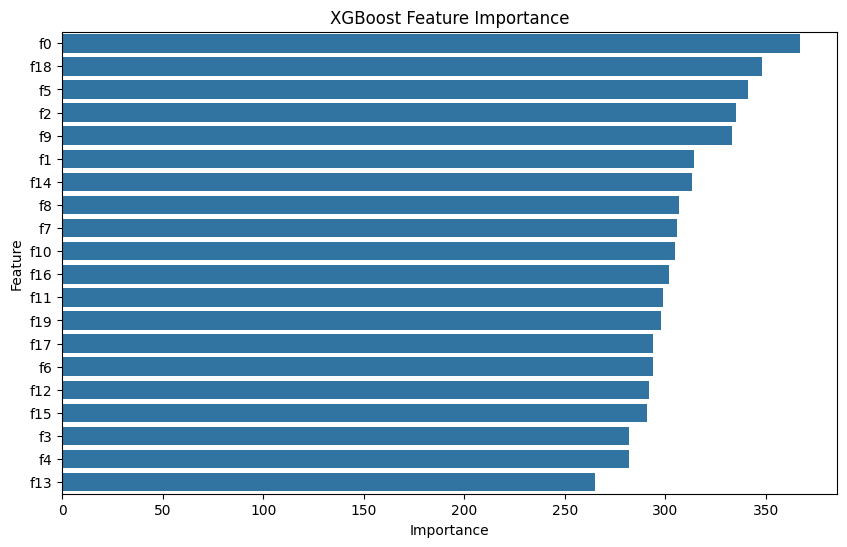

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title("XGBoost Feature Importance")
plt.show()

In [ ]:
with open("lr_model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [ ]:
# # for loading
# with open("xgb_model.pkl", "rb") as f:
#     loaded_xgb = pickle.load(f)

# # Make predictions on new data
# y_pred = loaded_xgb.predict(X_test_s)

**PREDICTIONS vs ACTUAL VALUE GRAPH**

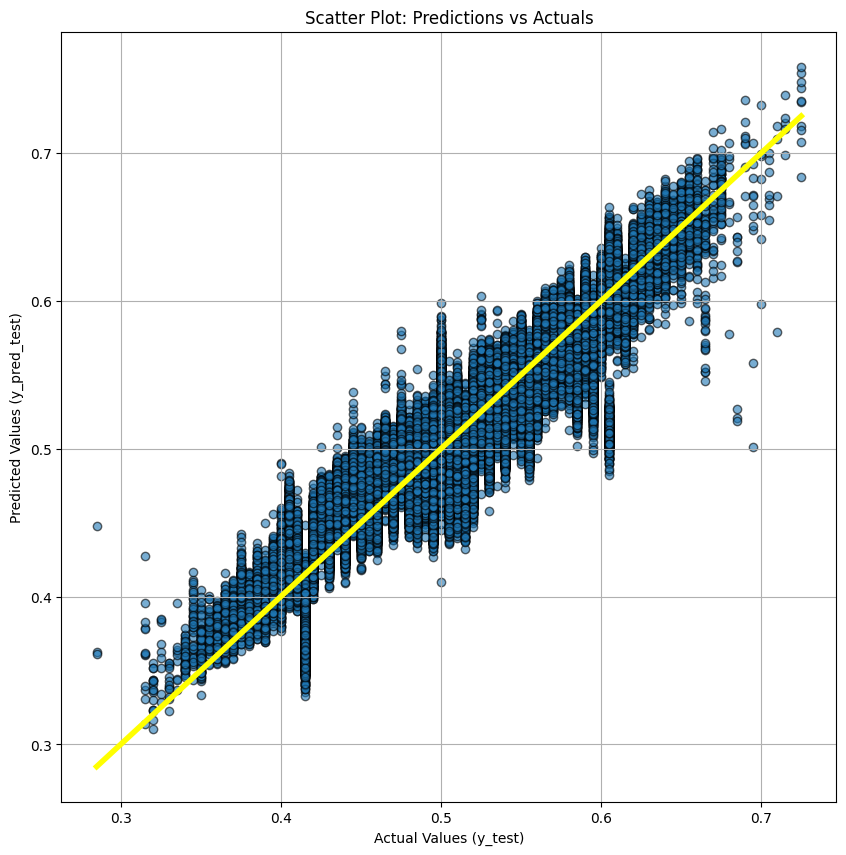

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow', linestyle='-',linewidth=4)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_test)")
plt.title("Scatter Plot: Predictions vs Actuals")
plt.grid(True)
plt.show()

For Linear Regression

***The scatter plot compares the predicted values from the model against the actual values from the test set.***

1. The points are distributed closely along the red dashed diagonal line (which represents the ideal case where predicted values equal actual values).

2. This indicates that the model has learned the underlying relationship well, as the predictions align strongly with the true outcomes.

3. The spread of points around the line shows some variance and small prediction errors, but no major systematic bias (e.g., consistent over- or under-prediction).

4. Overall, the visualization suggests the model performs well, with high correlation between predicted and actual values.

**Conclusion and Key Findings**

**The model comparison clearly identifies the best-performing approaches and the most significant features influencing flood probability.**



**A. Best Model Performance**

The Linear Regression and Ridge Regression models achieved the highest predictive accuracy:

Test R2 Score: 0.844 (for both).

Test RMSE: 0.02009 (the lowest error).

This high R2 and low RMSE indicate that these models can accurately predict the FloodProbability, and the high Train R2 (≈0.845) relative to the Test R2 suggests they are not overfitting.

**B. Overfitting and Poor Performance**

The Decision Tree Regressor severely overfit the training data, achieving a perfect Train R2 of 1.0 but a near-useless Test R2 of 0.053.

The Lasso Regression with the selected alpha (α=0.01) performed extremely poorly, with an R2 of effectively 0.0.

**C. Feature Importance (XGBoost)**

Based on the XGBoost Regressor (which achieved a strong Test R2 of 0.810) , the most critical factors influencing flood probability were:

(Monsoon Intensity),(Inadequate Planning),(Climate Change),(River Management),(Encroachments)

These findings emphasize that both natural forces (monsoon, climate change) and human factors (planning, management, encroachment) are the most important drivers of flood risk.